In [124]:
#Two Step Predictive Model implementing Random Forest Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, auc
from sklearn import metrics

data2 = pd.read_csv("HackRU_test.csv")


df = pd.read_csv("HackRU_train.csv")
Approved= df['Approved']
df = df.drop(["Approved"],axis=1)

from sklearn.model_selection import train_test_split

train, dev = train_test_split(df, test_size=0.2,random_state=4)
X_train = train.drop(["LowestRisk", "Id"],axis=1)
Y_train = train["LowestRisk"].to_frame()
X_dev  = dev.drop(["LowestRisk", "Id"],axis=1).copy()
Y_dev = dev["LowestRisk"].to_frame()


In [125]:
#Approval Model 
app_Data = pd.read_csv("HackRU_test.csv")




In [126]:
print(data2)

       Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0                   1              26        0.128205               2   
1                   1              26        0.230769               2   
2                   1              26        0.128205               2   
3                   1              26        0.846154               2   
4                   1              26        0.076923               2   
5                   1              26        0.076923               2   
6                   1              26        0.230769               2   
7                   1              10        0.487179               2   
8                   1              26        0.128205               2   
9                   1              26        0.384615               2   
10                  1              26        0.333333               2   
11                  1              26        0.230769               2   
12                  1              10        0.4871

In [127]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(X_train.values,Y_train.values)

accu = rf.score(X_dev, Y_dev)
print("Mean accuracy on dev set for 2 =  %s" % (accu))

result3 = rf.predict(X_dev)
print (classification_report(Y_dev, result3))

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean accuracy on dev set for 2 =  0.837596042522
             precision    recall  f1-score   support

          0       0.87      0.89      0.88      6398
          1       0.76      0.73      0.75      3103

avg / total       0.84      0.84      0.84      9501



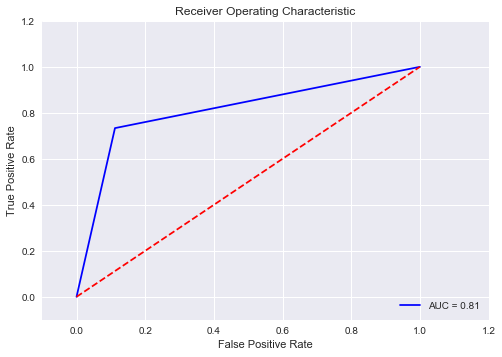

In [128]:

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(Y_dev,rf.predict(X_dev))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [129]:
app_Data['Risk'] = rf.predict(data2)
df_x = app_Data.drop(["Approved"],axis=1)
df_y = app_Data["Approved"].to_frame()


In [130]:
print(app_Data)

       Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0                   1              26        0.128205               2   
1                   1              26        0.230769               2   
2                   1              26        0.128205               2   
3                   1              26        0.846154               2   
4                   1              26        0.076923               2   
5                   1              26        0.076923               2   
6                   1              26        0.230769               2   
7                   1              10        0.487179               2   
8                   1              26        0.128205               2   
9                   1              26        0.384615               2   
10                  1              26        0.333333               2   
11                  1              26        0.230769               2   
12                  1              10        0.4871

In [131]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [132]:
rff=RandomForestClassifier(n_estimators=200)
rff.fit(x_train.values,y_train.values)

accu = rff.score(x_test, y_test)
print("Mean accuracy on dev set for 2 =  %s" % (accu))

result4 = rff.predict(x_test)
print(classification_report(y_test, result4))

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean accuracy on dev set for 2 =  0.89898989899
             precision    recall  f1-score   support

          0       0.90      1.00      0.95      2132
          1       0.83      0.02      0.04       244

avg / total       0.89      0.90      0.85      2376



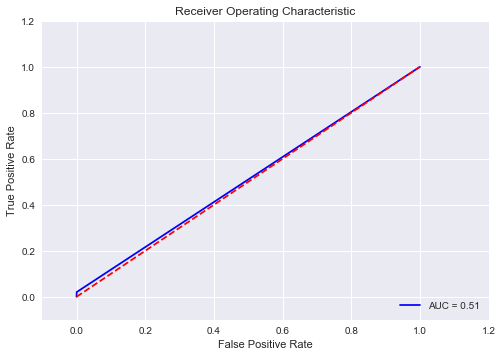

In [133]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test,rff.predict(x_test))
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [134]:
x_test["Approved Results "] = result4 

C:\Users\Ayush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
x_test.to_csv("Finalout.csv")